# PA8 Eigenfaces and Reconstruction

## Problem Statement

In this exercise you will be using SVD to create a dictionary of eigenfaces from a training set that will be used to reconstruct faces from a testing set. 

This assignment is broken down into the following three categories and each of their sub-categories: 

Please make sure that all images are displayed in grayscale, an example of how to do this has been given in the import cell
<ol>
    <li>Data visualization
    <ol>
        <li>Display single image that contains a face from all 36 training people in the training set</li>
        <li>Display a single image that contains all faces from the 10th person in the training set</li>
        <li>Display and return the average training face</li>
    </ol></li>
    <li>Compute SVD of training data
    <ol>
        <li> Mean center your training data (subtract the average face from all training faces) </li>
        <li> Take SVD of mean-centered training data </li>
    </ol></li>
    <li>Reconstruction experiments
    <ol>
        <li> Reconstruct a face from the training set using the first $p$ rows of your SVD matrix, $U$ </li>
        <li> Experiment on different values of $p$ </li>
    </ol></li>
</ol>

## Data set description:

The data set you will be using contains images of 38 different people's faces. Each person has 64 or less images taken of their face. Each image is taken under unique lightning conditions. The "nfaces" variable loaded in and described below details how many images are associated with each participant. There are a total of 2410 images in this data set.

All images of the same participant are grouped to be in order adjacent columns in the data matrix. For instance, the first participant has 64 associated images (given in the variable nfaces), and their images are found in the first 64 columns (index 0 to 63) of the matrix. The second participant has 62 associated images, and their images are found in the next 62 columns of the matrix (index 64 to 125) and so forth.

**Your training set will comprise of all images related to the first 36 people, and your testing set will be all images of the last 2 people**

The data is stored in a matlab data file (.mat). You can think of the .mat file as a large dictionary where each key in the .mat dictionary points to some relevant information about the data. I have provided code that loads the .mat file (scipy.io.loadmat function) and have stored the following information you will need to complete this assignment:
1. m_prime = int - number of pixel rows per image
2. n_prime = int - number of pixel columns per image
3. nfaces = List - each index, i, represents the number of photos provided for participant i
4. faces = 2D numpy array ((m*n) x 2410) in shape. each column is the "flattened" image of a participants face (all 38 people)
5. trainingFaces = 2D numpy array which represents all images of the first 36 participants
6. testingFaces = 2D numpy array which represents all images of the last 2 participants

Each column in the matrices faces, trainingFaces, and testingFaces, is a "flattened" image of one of the participants. See below for the description of "falttened", and how you can reshape the image if needed. 

### Flattening and reshaping an image

When dealing with images, it is common practice to "flatten" each image from a 2D array of (m' x n') dimensions, to a 1D array of dimensions $m'*n' \times 1$ column vector. 

To flatten a 2D image to a 1D vector, simply call the function: "flattened = nd_array.flatten()"

To reshape a flatten image to its original shape ($m' \times n'$), call the following function: "original_shape_image = np.reshape(flattened, ($m'$, $n'$))" where "flattened" is the 1D flattened image

## Single Value Decomposition (SVD)

Please review the following slides regarding SVD linked <a href="https://drive.google.com/file/d/1mVzWOKpFq1qKKNNKsAzbUtSrp6QrQESz/view"> here </a>. If you are looking to gather a more intuitive sense of SVD, take a look at the "Intuitive interpretations" section of the <a href = "https://en.wikipedia.org/wiki/Singular_value_decomposition#Intuitive_interpretations">SVD wikipedia </a>, and in particular the animated gif of SVD on the wikipedia page. 

Recall that SVD factors can factor a real valued matrix, $A$, into the form $A = U \Lambda V^T$ where
1. $A$ is a real matrix of dimensions $n \times m$
2. $U$ is a real orthogonal matrix of dimensions $n \times r$
3. $\Lambda$ is a diagonal real matrix of dimensions $r \times r$
4. $V$ is a real orthogonal matrix of dimensions $m \times r$

Key Notes for Using SVD in this assignemnt: 
<ol>
    <li>$n$ is the number of pixels per image, and $m$ is the number of images</li>
    <li>you can use the built in np function "np.linalg.svd"; its documentation can be found <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html"> here </a>. </li>
    <li>Before taking the SVD, mean center your training data: subtract the average face from each image of your training data. 
    <li>When calling np.linalg.svd, set the parameter "full_matrices" to 0</li>
    <li>We will only be interested in one of the resulting matrices, $U$, of the decomposition. </li>
</ol>


## Eigenfaces (U)
Notice that if my original matrix, A, is a $n \times m$ matrix, then one of my decomposition matrices from SVD, $U$, has a dimension $n \times r$. Recall that we can reshape a $n$ dimensional column of my original matrix into an image of a face. As it tursn out, we can also reshape a $n$ dimensional column of $U$ into an image of a face as well.

To be more precise, we call each column of $U$ an **eigenface**. Our collection of eigenfaces or a subset of our collection, organized as a matrix, can be used to reconstruct images of new faces as a linear combination of our set set of eigenfaces. Of particular interest are images that did not contribute to the SVD (images from our testing set). 

### Using Eigenfaces to reconstruct new faces
Let us define $U_p$ to be an $n \times p$ matrix that is the first $p$ columns of $U$ from the SVD of our mean-centered training set, and let us define $x$ to be an $n$ dimensional vector that is the mean centered flattened image of an image from our testing set. 

**Use the average face of the training data to also mean-center your testing image.**

Consider the following matrix vector multiplication $$\alpha = (U_p^T) x$$

Our resulting vector, $\alpha$ will be of dimensions $p \times 1$. Each index of $\alpha$, $i$, holds a value that represents the amount of eigenface $i$ that is needed to reconstruct $x$. In particular $$\hat{x} = \sum_{i=1}^p \alpha_i * (U_p)_i$$ in vector form: $$\hat{x} = U_p \alpha$$

Where $\hat{x}$ is our reconstruction of the original image $x$. We clearly see that $\hat{x}$ is simply a linear combination of columns from our matrix, $U$. 

training shape:  (32256, 2282)
testing shape:  (32256, 128)


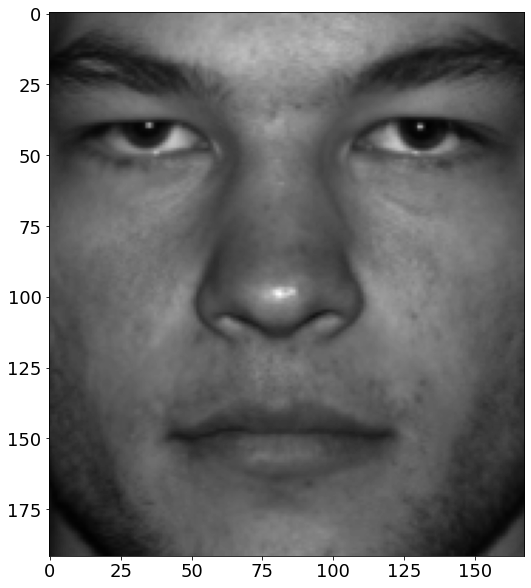

In [1]:
#import cell and data loading
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})

#set as global variables that can balled in any function
mat_contents = scipy.io.loadmat(os.path.join('.','DATA','allFaces.mat'))


#common variables
faces = mat_contents['faces'] #data, where each column is a flattened image
m_prime = int(mat_contents['m']) #number of pixel rows in each image
n_prime = int(mat_contents['n']) #number of pixel cols in each image
nfaces = np.ndarray.flatten(mat_contents['nfaces']) #list of how many images per participant

training_cut_off = np.sum(nfaces[:36])
trainingFaces = faces[:,:training_cut_off]
testingFaces = faces[:,training_cut_off:]

print("training shape: ", trainingFaces.shape)
print("testing shape: ", testingFaces.shape)

#example of how to display an image in gray scale
img = plt.imshow(np.reshape(testingFaces[:,0],(m_prime,n_prime)).T) #plots an image after reshaping
img.set_cmap('gray') #sets an image to display on gray scale

In [2]:
def display_all_participants():
    '''
    Input: None (remember that you have access to the global variables from the import cell)
    Output: None
    
    Create a single image that contains one photo from each of the 36 training participants 
    organized as a 6 x 6 matrix of images
    '''
    pass

display_all_participants()

Here is an example output for "display_all_participants()"
![example all participants image](allparticipants.png)

In [3]:
def display_one_participant(p_id):
    '''
    Input: 
        p_id = index of the person to be displayed 
        (remember that you have access to the global variables from the import cell)
    Output: None
    
    create and display a single image of all images of the participant at index, p_id. 
    This single image should be organized as an 8x8 image matrix, and if the participant has less than 64 images, 
    unused image matrix cells can be left as all 0's
    
    '''
    pass
            
display_one_participant(5)
    

Here is an example of an output of "display_one_participant" for person_id (p_id) = 8
![example one participant image](oneparticipant.png "person 8")

In [4]:
def average_face(trainFaces):
    '''
    Input: 
        trainFaces: np array - matrix of images of training faces, each column is a flattened image
        (remember that you have access to the global variables from the import cell)
        
    Output: np-array - (n'*m'x 1) flattened image of the average face from the training participants
    
    Take the average of the training set to find the average face. Display the average face as well return it
    '''
    avgFace = None


    return avgFace

avg_face = average_face(trainingFaces) #once this cell is run, you can access "avg_face" from any cell as a global variable

In [5]:
def mean_center_SVD(trainFaces, avg_face):
    '''
    Input:
        trainFaces = np array - matrix of images of training faces, each column is a flattened image
        avg_face = np array (n*m by 1) which is the result from "average_face()"
        (remember that you have access to the global variables from the import cell)
        
    Output:
        np-array: U from the SVD, which is a (n x r) matrix
        
    1. Take the SVD of the mean-centered training data
    2. Display the eigenface at index 0
    3. Return the matrix U.
    '''
    pass

U = mean_center_SVD(trainingFaces, avg_face) #once this cell is run, you can call "U" is a global variable from any cell.
                              #Be sure to run "average_face()" first to have access to "avg_face"

In [6]:
def reconstruct(U, p, x):
    '''
    Input:
        U = np array (n x r) from "mean_centered_SVD()"
        p = int, representing the first p eigenfaces to use in the reconstruction
        x = np array (n x 1) represents an original image
        (remember that you have access to the global variables from any cell)
        
    output:
        x_hat = np array (n x 1) reconstruction of x using the eigenfaces in U
        
    Reconstruct x, x_hat, using the first p columns of U. 
    
    A few notes to remember:
        1. x_hat = Up(Up.T)x, to speed up computation, we recommend first computing alpha = (Up.T)x, and afterwards computing
            Up(alpha). 
        2. Mean center x before reconstruction
        3. Because U and x will both be mean centered, your final step in the reconstruction needs to be "x_hat += avg_face"
    '''
    pass


In [7]:
def reconstruct_experiments(photo_index, p_list = [25, 50, 100, 200, 400]):
    '''
    Input:
        photo_index: int between 0 <= photo_index <= cols(testingFaces). represents a specific photo from testingFaces
        p_list: List, represents the values of p to be used in the reconstruction of photo at index photo_index
        (remember that you have access to the global variables from any cell)

    Output:
        None
    
    Make sure this function does the following:
        1. Displays the original image to be reconstructed
        2. Displays the reconstruction of the original image for each p in p_list
        3. All reconstructions are labelled clearly as to the value of p that created that reconstructed image
    '''
    pass
